<a href="https://colab.research.google.com/github/CesarC15/projetoML/blob/main/src/deteccao_anomalias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Setup Infraestrutura e Dados**

In [2]:
pip install kagglehub[pandas-datasets] ydata-profiling imbalanced-learn seaborn matplotlib -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.4 MB/s eta 0:00:00


In [12]:
import kagglehub
import pandas as pd
import numpy as np
import os
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [4]:
#Aquisição de Dados
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
file_path = os.path.join(path, 'creditcard.csv')

Using Colab cache for faster access to the 'creditcardfraud' dataset.


In [5]:
df = pd.read_csv(file_path)

print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
#Análise Exploratória (EDA)
profile = ProfileReport(df, title="Profiling Report")
profile.to_notebook_iframe()

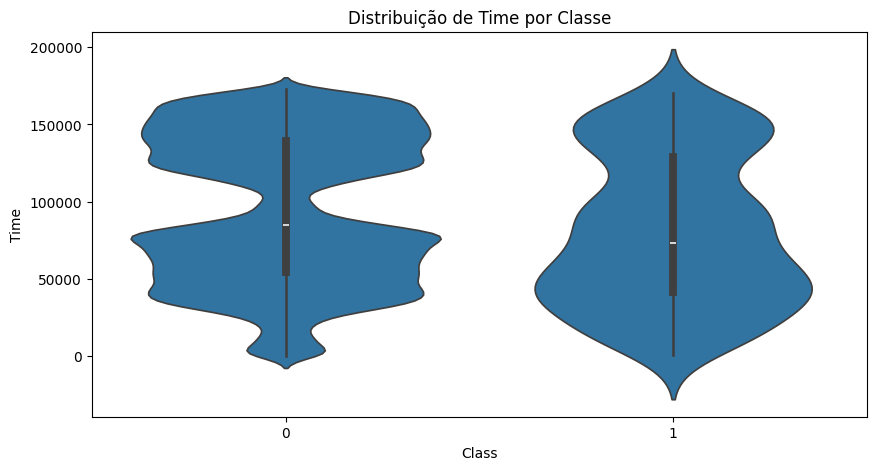

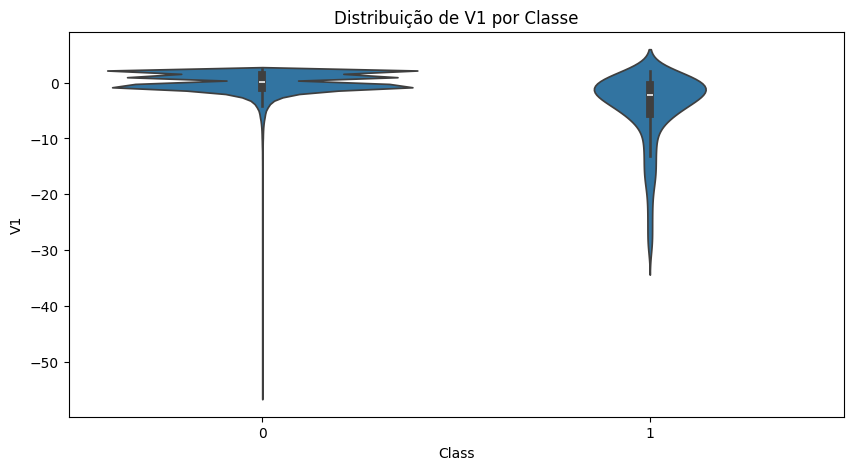

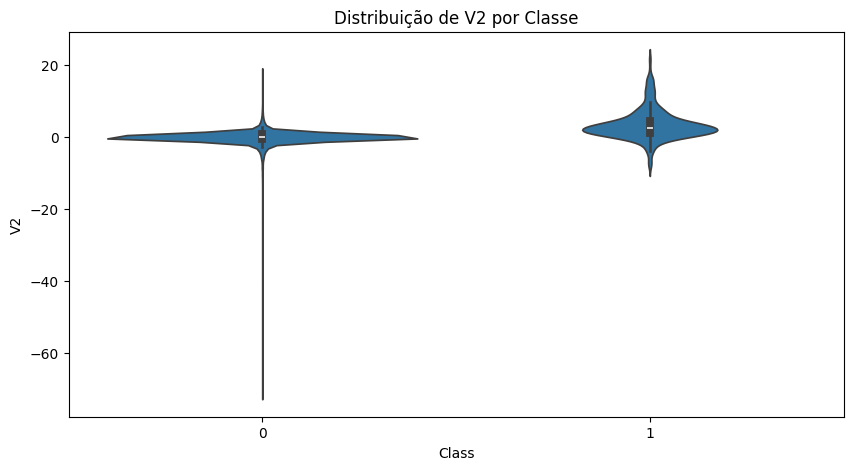

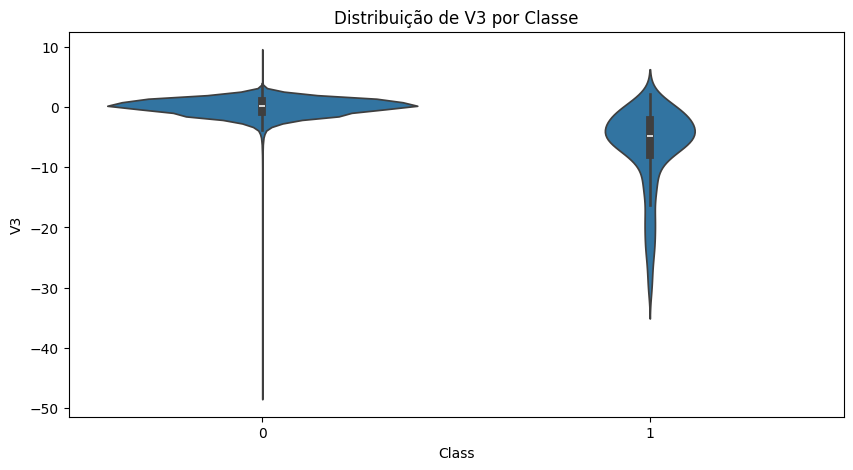

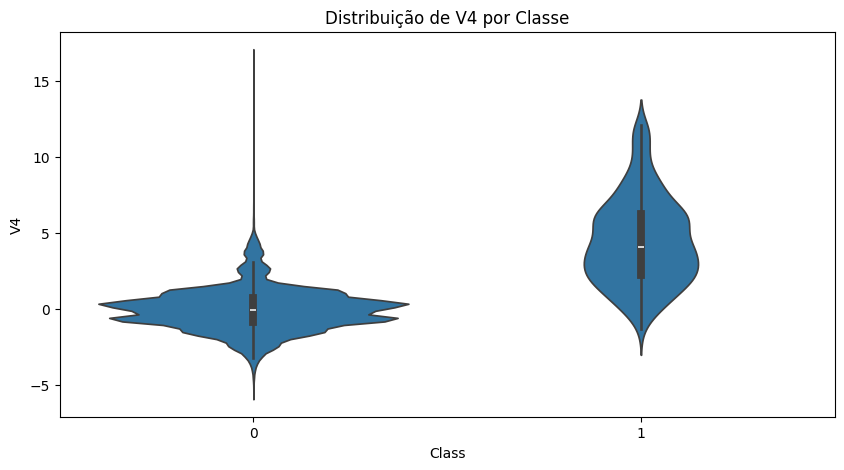

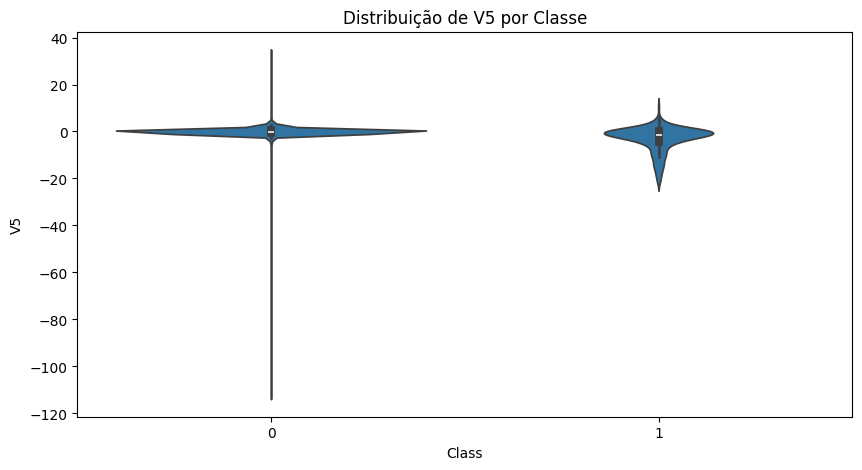

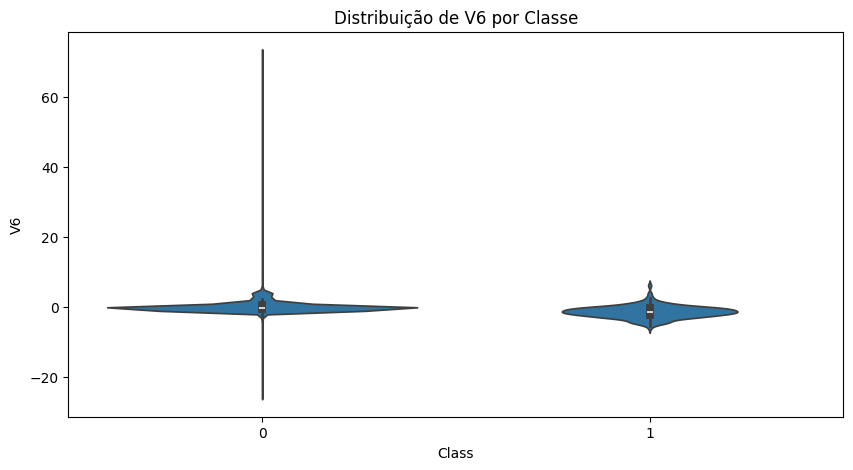

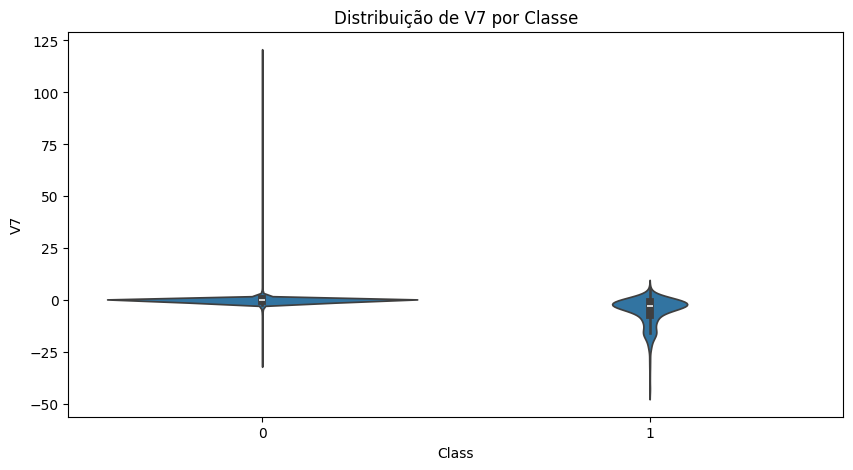

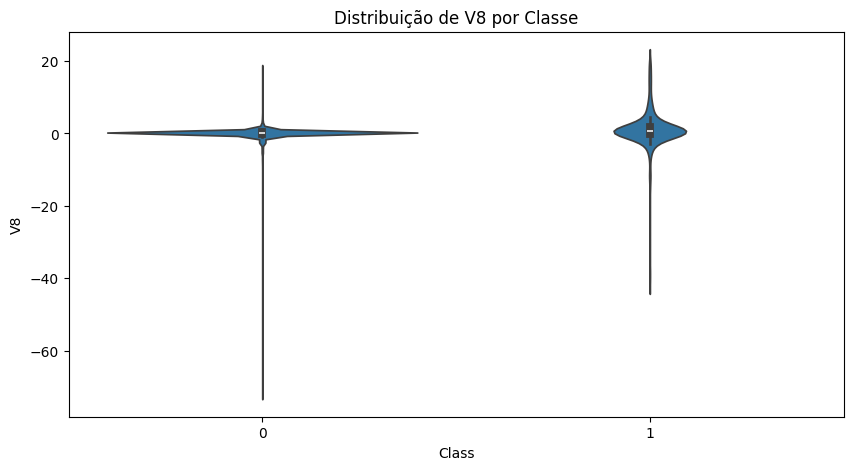

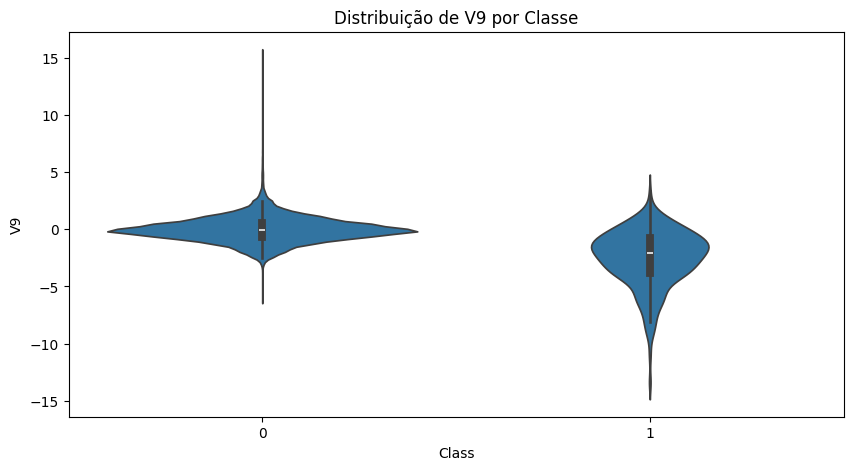

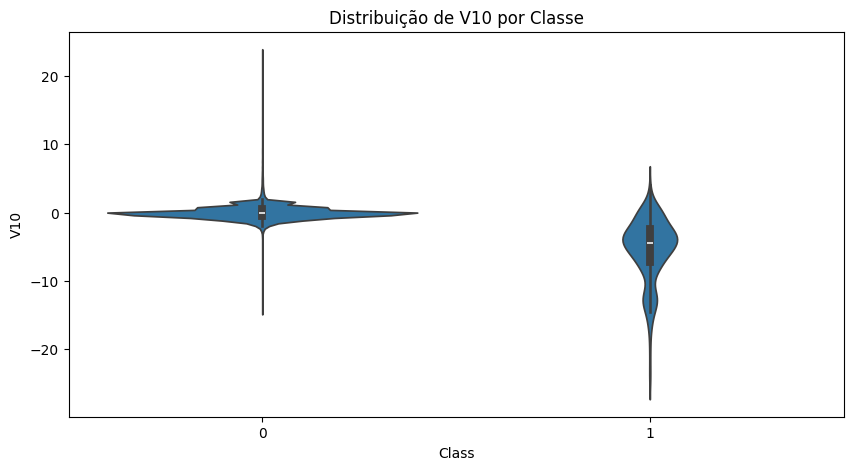

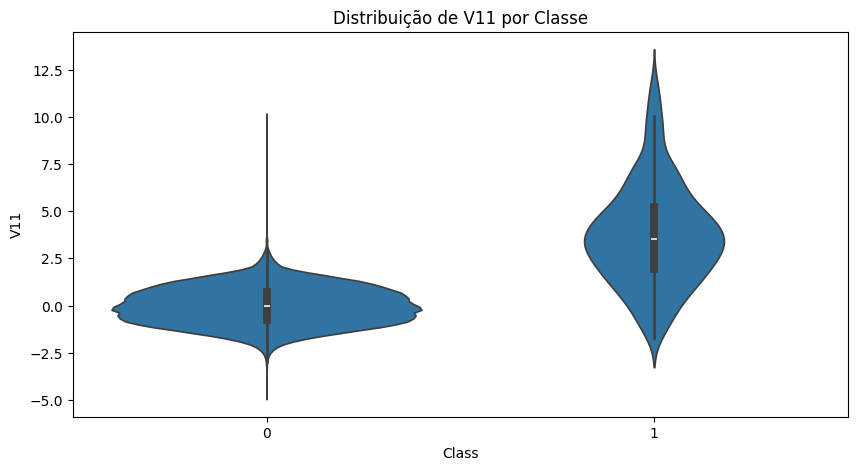

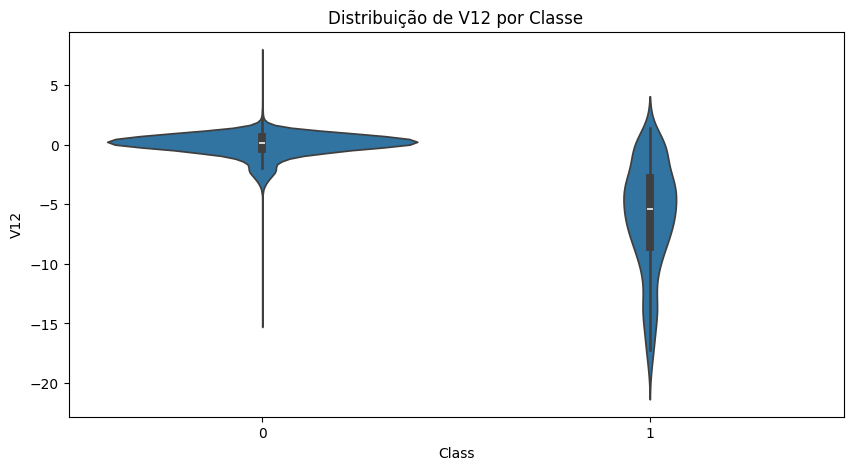

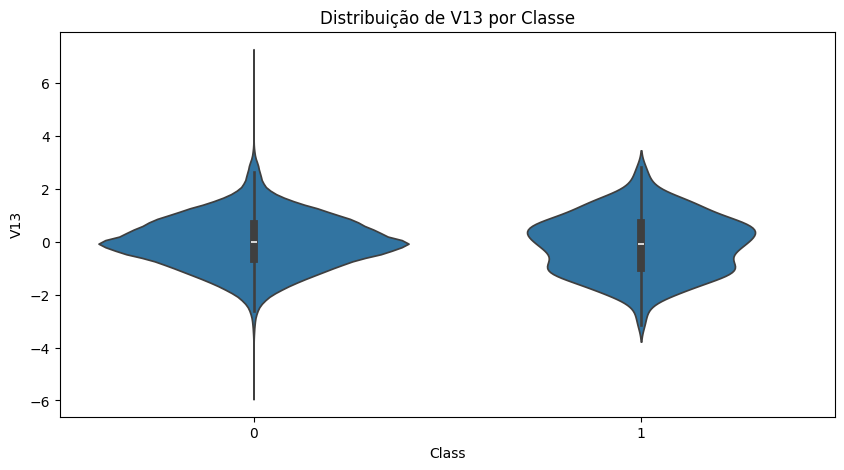

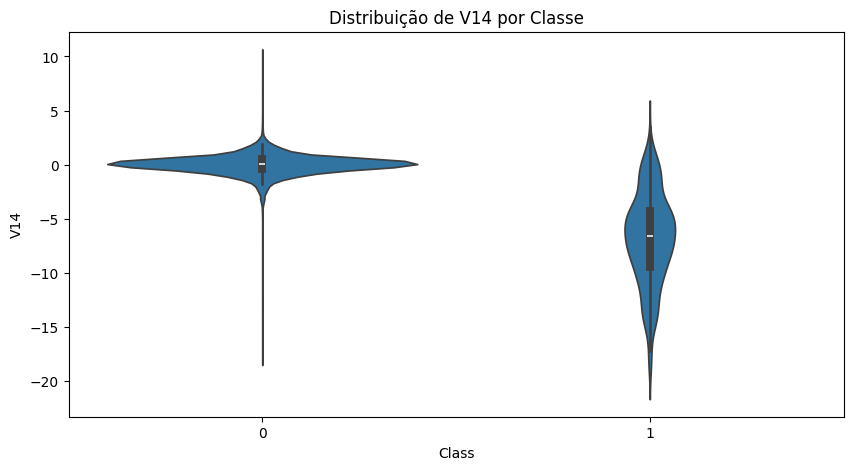

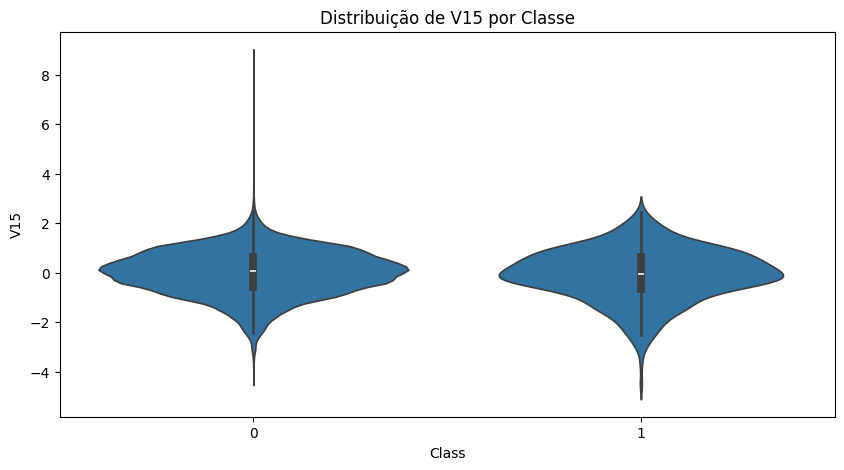

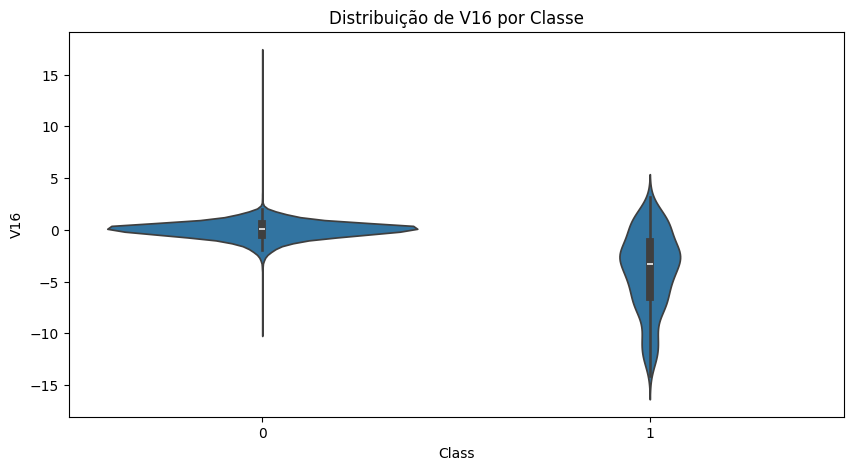

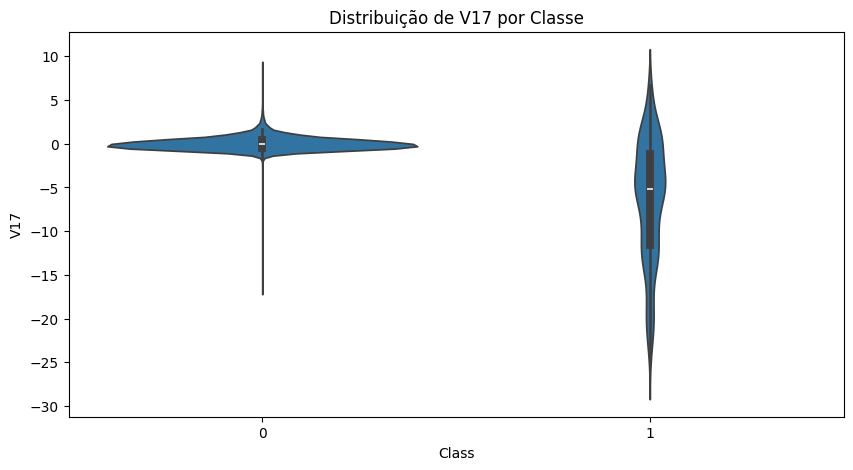

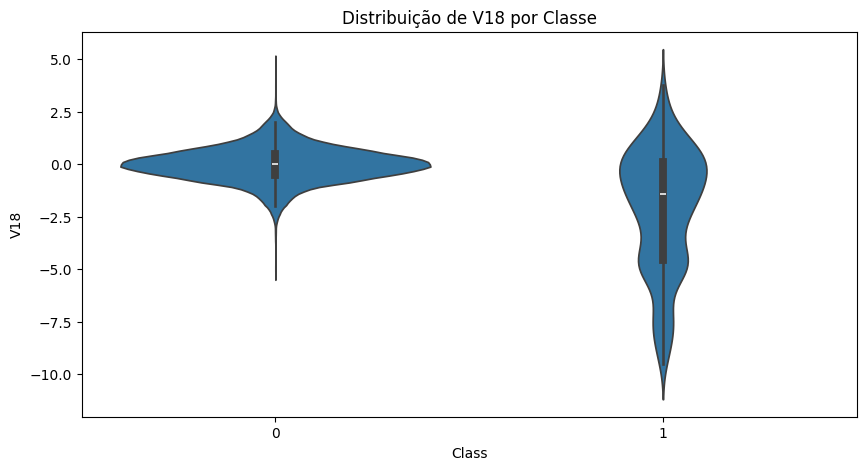

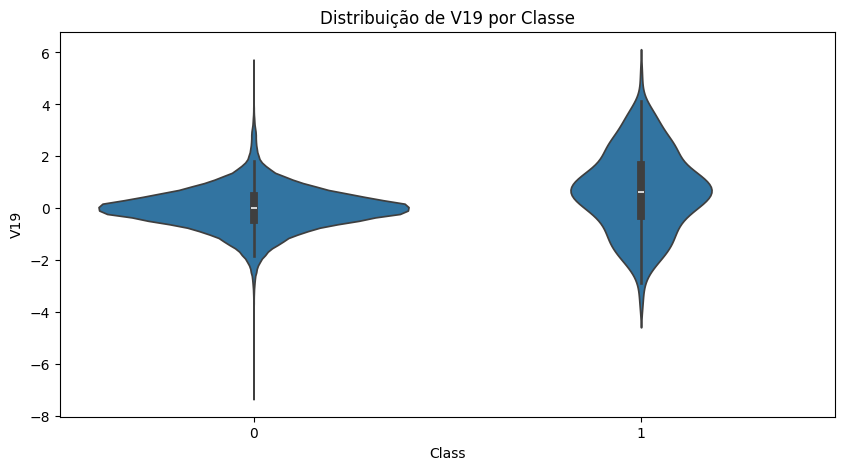

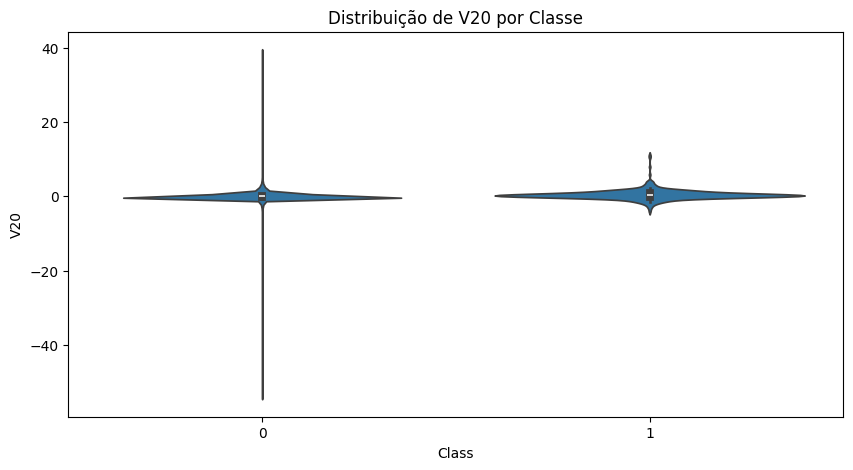

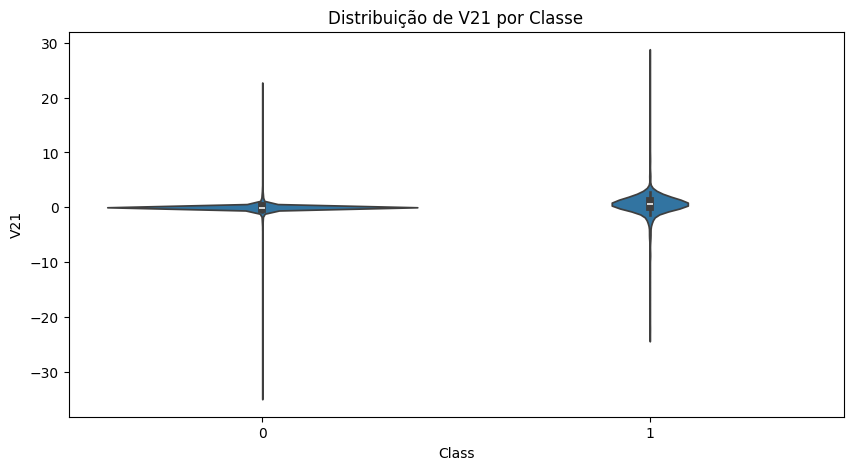

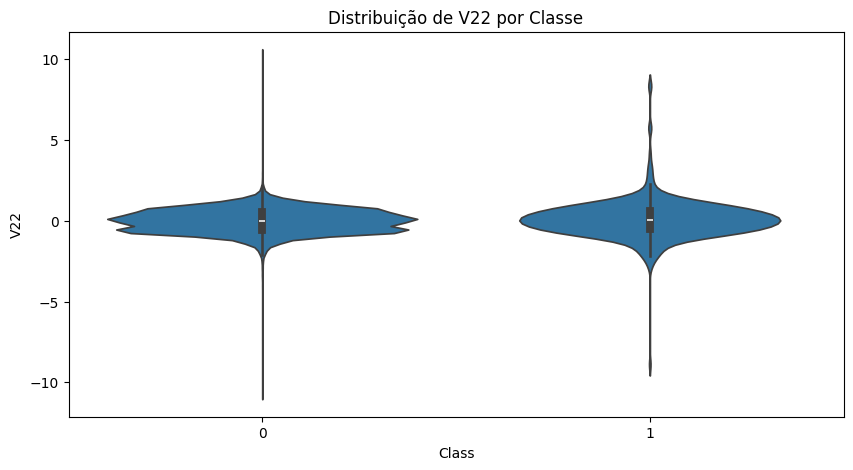

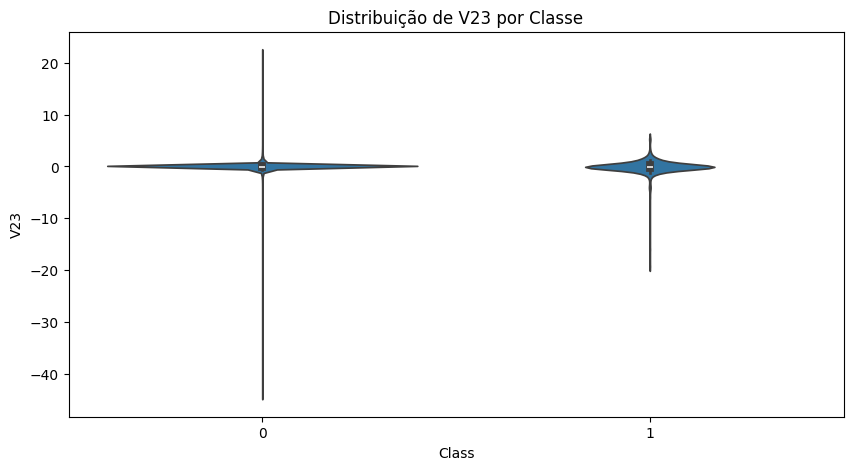

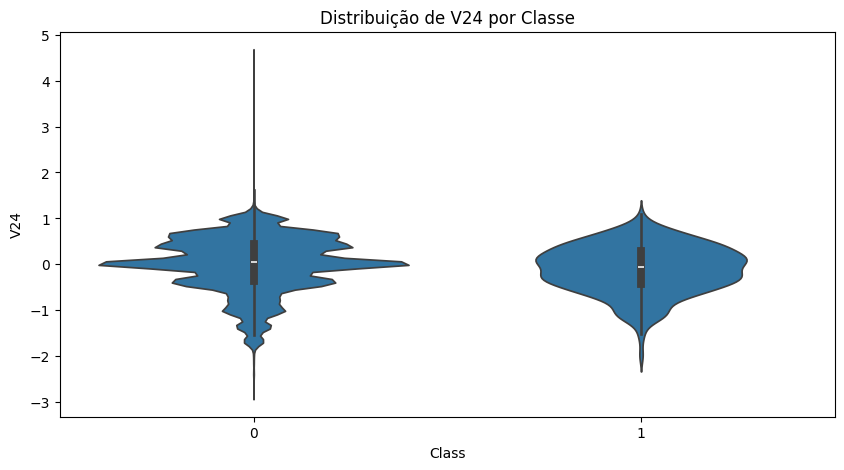

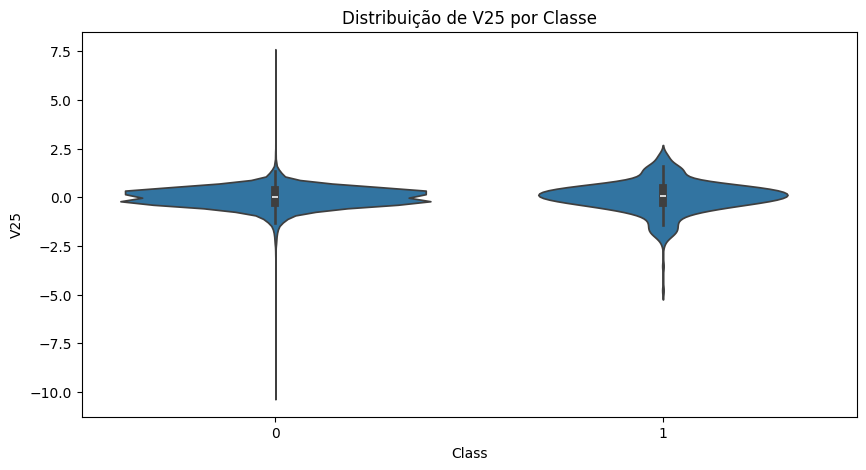

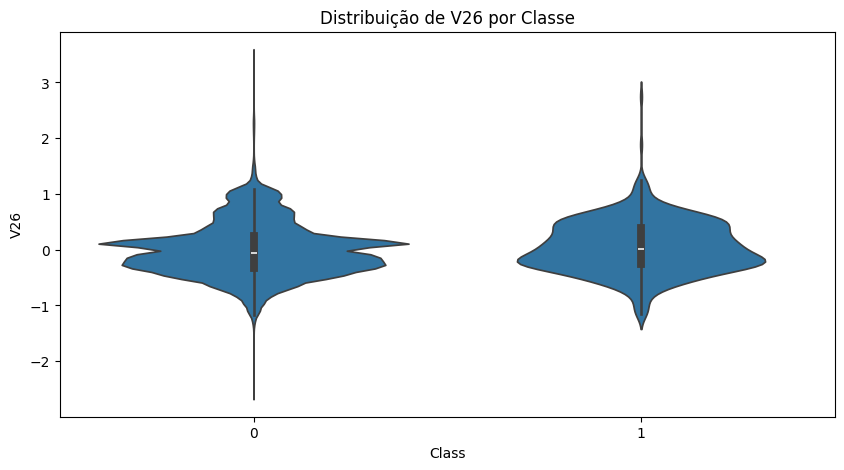

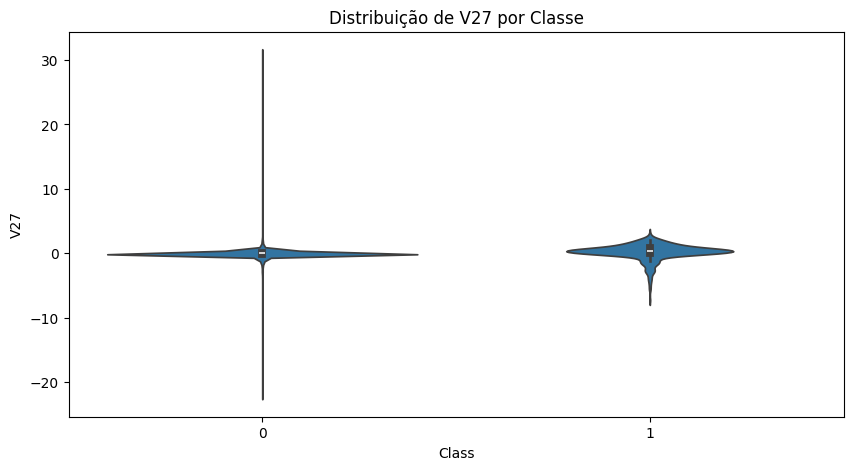

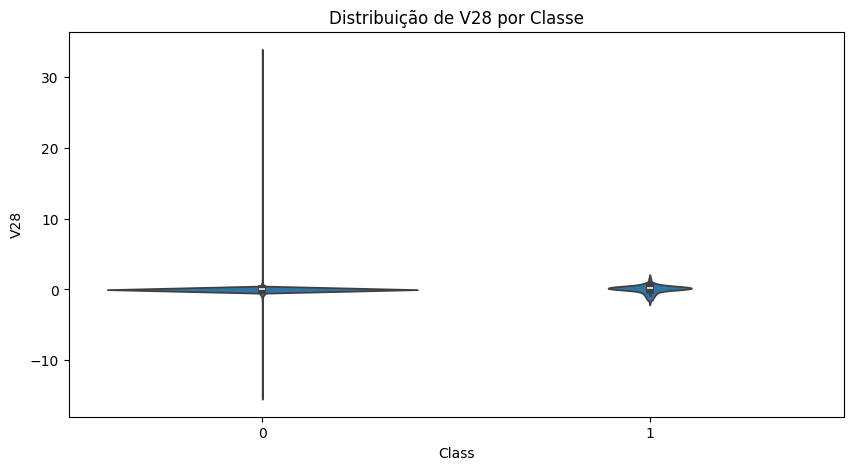

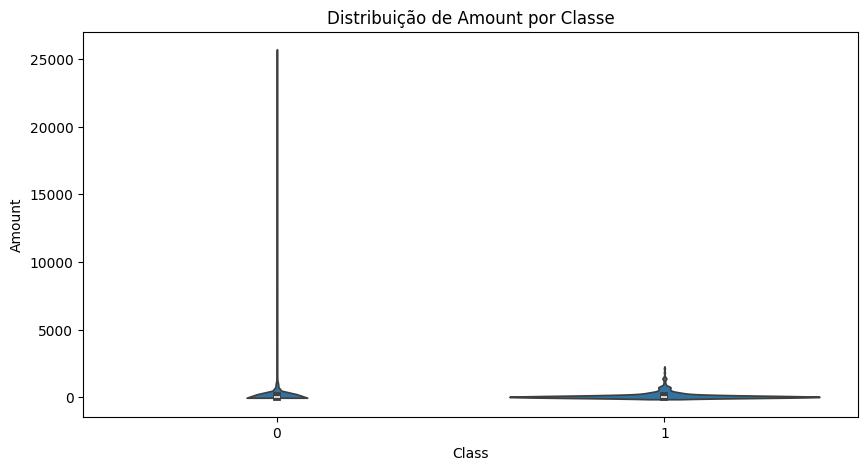

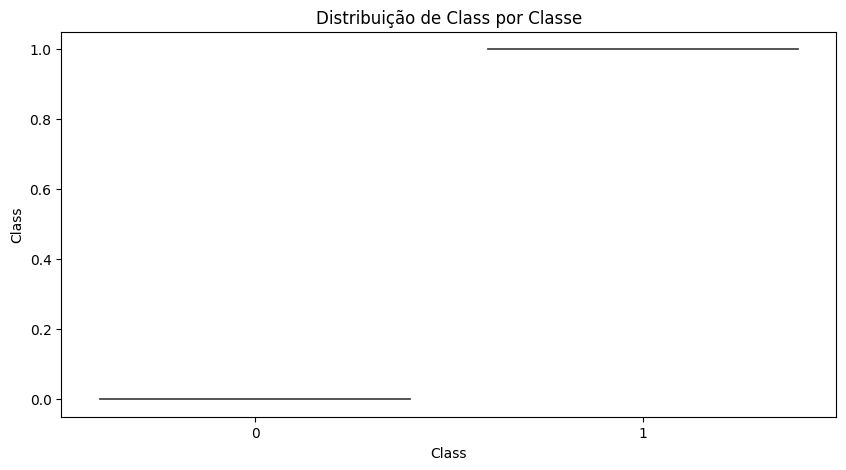

In [ ]:
for column in df:
    plt.figure(figsize=(10, 5))
    sns.violinplot(x='Class', y=column, data=df)
    plt.title(f'Distribuição de {column} por Classe')
    plt.show()

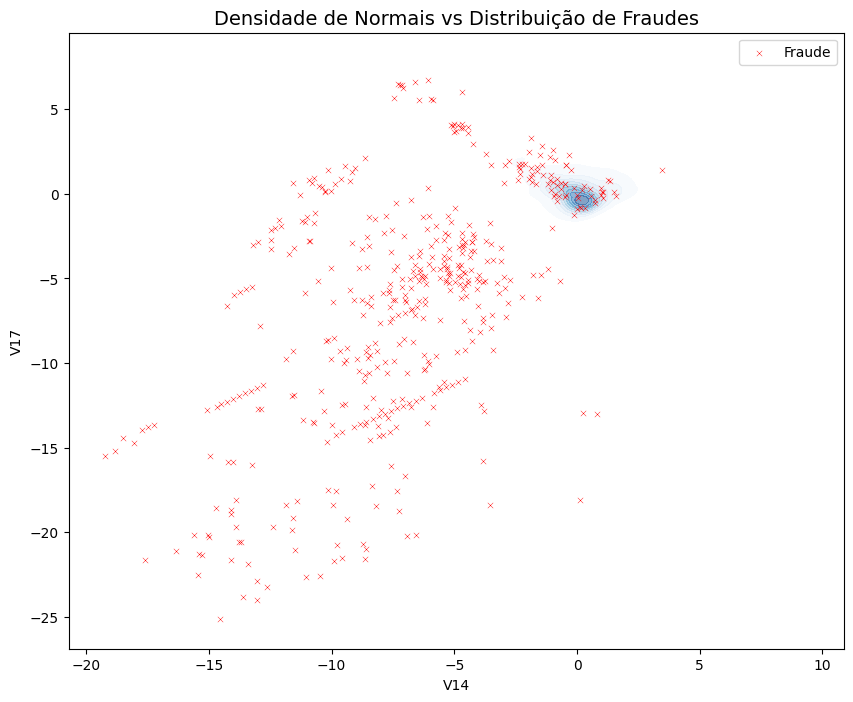

In [ ]:
plt.figure(figsize=(10, 8))

sns.kdeplot(
    data=df[df['Class'] == 0],
    x='V14', y='V17',
    cmap="Blues", fill=True, thresh=0.05, alpha=0.5
)

sns.scatterplot(
    data=df[df['Class'] == 1],
    x='V14', y='V17',
    color='red', s=15, marker='x', label='Fraude'
)

plt.title('Densidade de Normais vs Distribuição de Fraudes', fontsize=14)
plt.legend()
plt.show()

In [6]:
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [7]:
#Pré-processamento
#----------------#
#Tratamento de Nulos e Duplicatas
print(f"Tamanho com duplicata: {df.shape[0]}")
df.drop_duplicates(inplace=True)
print(f"Tamanho sem duplicata: {df.shape[0]}")

print(f"Número de nulos: {df.isnull().sum().sum()}")

#Scaling e Encoding
##V1 até V28 já passaram por transformação de PCA, precisa normalizar só Time e Ammount
#TODO: Acho que é bom colocar depois no relatório sobre PCA
#Não pode fazer isso antes do split, fica para depois

Tamanho com duplicata: 284807
Tamanho sem duplicata: 283726
Número de nulos: 0


In [8]:
#Split de Dados (Estratégia de Validação)
X = df.drop("Class", axis=1)
y = df["Class"]

#Proporção igual de fraude para cada conjunto
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=RANDOM_STATE, stratify=y_temp)

print(f"Amostras de treino: {X_train.shape[0]}")
print(f"Amostra de teste: {X_test.shape[0]}")
print(f"Amostra de validação: {X_val.shape[0]}")

print(f"Fraudes no treino: {y_train.sum()}")
print(f"Fraudes no teste: {y_test.sum()}")
print(f"Fraudes na validação: {y_val.sum()}")

Amostras de treino: 198608
Amostra de teste: 42559
Amostra de validação: 42559
Fraudes no treino: 331
Fraudes no teste: 71
Fraudes na validação: 71


In [9]:
#Scaling
scaler = StandardScaler()
scaler.fit(X_train[y_train == 0])

X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns, index=X_val.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [10]:
#Conjuntos para o autoencoder(não pode ter fraude no treino)
X_train_ae = X_train[y_train == 0].copy()
X_val_ae = X_val.copy()
X_test_ae = X_test.copy()

In [11]:
#Conjunto para o t-SNE
X_tsne_fraude = X_train[y_train == 1]

X_tsne_normal = X_train[y_train == 0]
X_tsne_normal = X_tsne_normal.sample(n=20000, random_state=RANDOM_STATE)

X_tsne = pd.concat([X_tsne_fraude, X_tsne_normal])
y_tsne = np.concatenate([
    np.ones(len(X_tsne_fraude)),
    np.zeros(len(X_tsne_normal))
])

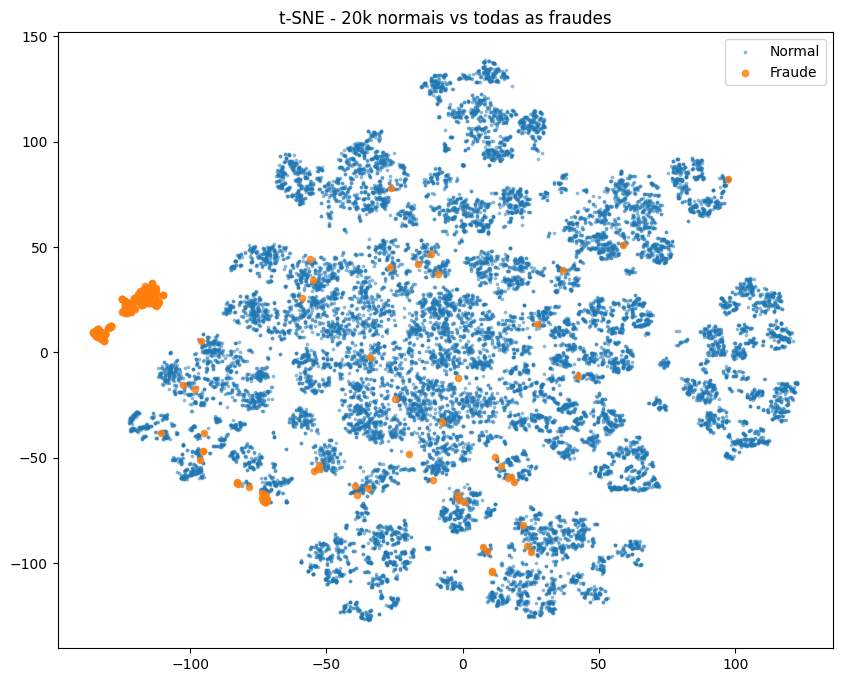

In [14]:
#t-SNE
tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate='auto',
    init='pca',
    max_iter=1500,
    random_state=RANDOM_STATE
)

X_tsne_embedded = tsne.fit_transform(X_tsne)
plt.figure(figsize=(10, 8))

#Normais
plt.scatter(
    X_tsne_embedded[y_tsne == 0, 0],
    X_tsne_embedded[y_tsne == 0, 1],
    s=3, alpha=0.4, label="Normal"
)

#Fraude
plt.scatter(
    X_tsne_embedded[y_tsne == 1, 0],
    X_tsne_embedded[y_tsne == 1, 1],
    s=20, alpha=0.8, label="Fraude"
)

plt.title("t-SNE - 20k normais vs todas as fraudes")
plt.legend()
plt.show()


# **Modelagem Clássica**

In [ ]:
#Baseline
#----------------#
#Isolation Forest (Probabilístico)

#LOF ou KNN (Distância/Densidade)

In [ ]:
#Feature Selection (Feature Engineering)

In [ ]:
#Otimização de Hiperparâmetros (Clássicos)

# **Deep Learning & Avançado**

In [ ]:
#Arquitetura Autoencoder

In [ ]:
#Pipeline de Treino Autoencoder

In [ ]:
#Definição de Threshold de Anomalia

In [ ]:
#Refinamento do Autoencoder

# **Avaliação e Validação Estatística**

In [ ]:
#Consolidação de Métricas

In [ ]:
#Visualização de Resultados

In [ ]:
#Teste de Significância Estatística

In [ ]:
#Análise de Falhas